In [1]:
!pip install pycaret[tuners]

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB ? eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached xxhash-3.4.1-cp311-cp311

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
column_types = df.dtypes

print(column_types)

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [4]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
# Import necessary libraries
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model

# Load your dataset
import pandas as pd

# Configuración del experimento
exp_sc180897 = setup(data=df, 
                   target='Target', 
                   session_id=123, 
                   train_size=0.7, 
                   ignore_features=['id'], 
                   numeric_features=["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Previous qualification (grade)","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Admission grade","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP"])

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 38)"
5,Transformed data shape,"(76518, 37)"
6,Transformed train set shape,"(53562, 37)"
7,Transformed test set shape,"(22956, 37)"
8,Ignore features,1
9,Numeric features,36


In [6]:
# Comparación de modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8293,0.9432,0.8293,0.8288,0.8278,0.7251,0.7265,2.4880
gbc,Gradient Boosting Classifier,0.8267,0.0000,0.8267,0.8259,0.8249,0.7207,0.7223,12.7930
rf,Random Forest Classifier,0.8248,0.9378,0.8248,0.8235,0.8227,0.7174,0.7191,3.9050
et,Extra Trees Classifier,0.8230,0.9363,0.8230,0.8218,0.8206,0.7141,0.7161,3.9600
ada,Ada Boost Classifier,0.8186,0.0000,0.8186,0.8192,0.8172,0.7078,0.7097,1.4600
lda,Linear Discriminant Analysis,0.8042,0.0000,0.8042,0.8089,0.8023,0.6830,0.6873,0.3520
ridge,Ridge Classifier,0.7934,0.0000,0.7934,0.7891,0.7799,0.6565,0.6691,0.2150
lr,Logistic Regression,0.7888,0.0000,0.7888,0.7876,0.7850,0.6575,0.6610,8.5950
qda,Quadratic Discriminant Analysis,0.7713,0.0000,0.7713,0.7618,0.7642,0.6283,0.6307,0.3480
nb,Naive Bayes,0.7661,0.8912,0.7661,0.7599,0.7603,0.6195,0.6225,0.1970


In [7]:
dt = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8346,0.9461,0.8346,0.8345,0.8336,0.7344,0.7354
1,0.8225,0.9418,0.8225,0.8214,0.8208,0.7142,0.7155
2,0.8204,0.9384,0.8204,0.8199,0.8188,0.7106,0.7121
3,0.8413,0.9484,0.8413,0.8418,0.8404,0.7448,0.7462
4,0.8264,0.9437,0.8264,0.8261,0.8252,0.7207,0.7219
5,0.8277,0.9409,0.8277,0.8244,0.8242,0.7212,0.7232
6,0.8282,0.9437,0.8282,0.8284,0.8270,0.7235,0.7249
7,0.8254,0.9418,0.8254,0.8256,0.8240,0.7188,0.7205
8,0.8344,0.9420,0.8344,0.8331,0.8326,0.7332,0.7346


In [22]:
params = {'num_leaves': (10,20),  # Número máximo de hojas por árbol
    'learning_rate': (0.1,0.5),  # Tasa de aprendizaje
    'feature_fraction': (0.5,0.8),  # Proporción de características a considerar en cada iteración
    'bagging_fraction': (0.5,0.8),  # Proporción de datos a considerar en cada iteración
    'bagging_freq': (5,6),  # Frecuencia de uso de muestreo
}

# Perform Bayesian Search
tuned_dt = tune_model(dt, custom_grid=params, search_library='scikit-optimize',search_algorithm='bayesian')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.9466,0.8361,0.8359,0.8350,0.7366,0.7377
1,0.8251,0.9422,0.8251,0.8242,0.8234,0.7184,0.7197
2,0.8219,0.9390,0.8219,0.8214,0.8201,0.7127,0.7144
3,0.8398,0.9491,0.8398,0.8403,0.8388,0.7424,0.7438
4,0.8295,0.9434,0.8295,0.8294,0.8283,0.7257,0.7270
5,0.8333,0.9408,0.8333,0.8302,0.8297,0.7300,0.7323
6,0.8323,0.9433,0.8323,0.8333,0.8315,0.7303,0.7318
7,0.8299,0.9427,0.8299,0.8311,0.8290,0.7263,0.7280
8,0.8333,0.9431,0.8333,0.8312,0.8311,0.7312,0.7326


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [23]:
print(tuned_dt)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


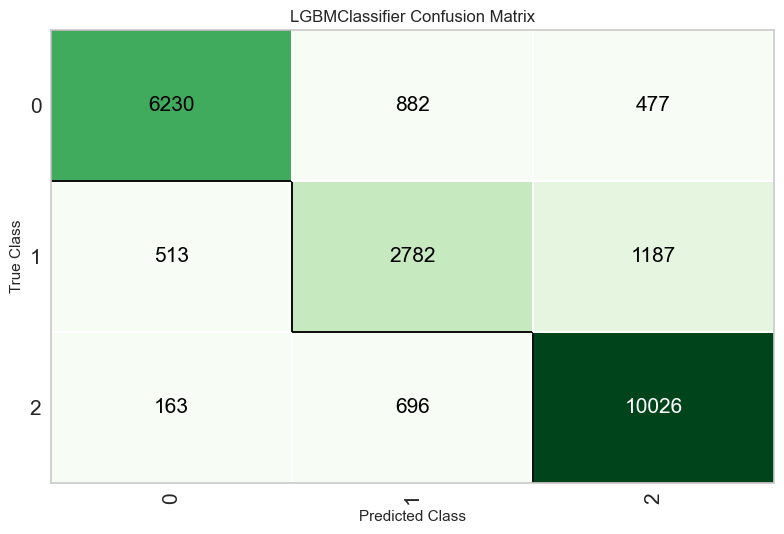

In [24]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

In [25]:
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

In [26]:
df_test = pd.read_csv('test.csv')
column_types = df_test.dtypes
print(column_types)

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [27]:
# Realizar predicciones
predictions = predict_model(final_dt, data=df_test)
predictions

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,prediction_label,prediction_score
0,76518,1,1,1,9500,1,1,141.000000,1,3,...,8,0,0,0.000000,0,13.9,-0.3,0.79,Dropout,0.9939
1,76519,1,1,1,9238,1,1,128.000000,1,1,...,6,6,6,13.500000,0,11.1,0.6,2.02,Graduate,0.9731
2,76520,1,1,1,9238,1,1,118.000000,1,1,...,6,11,5,11.000000,0,15.5,2.8,-4.06,Graduate,0.7408
3,76521,1,44,1,9147,1,39,130.000000,1,1,...,8,14,5,11.000000,0,8.9,1.4,3.51,Enrolled,0.4392
4,76522,1,39,1,9670,1,1,110.000000,1,1,...,6,9,4,10.666667,2,7.6,2.6,0.32,Enrolled,0.6613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.000000,1,38,...,0,0,0,0.000000,0,15.5,2.8,-4.06,Dropout,0.8678
51008,127526,2,39,1,9119,1,19,133.100006,1,19,...,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout,0.9895
51009,127527,1,1,1,171,1,1,127.000000,1,1,...,0,0,0,0.000000,0,15.5,2.8,-4.06,Dropout,0.9773
51010,127528,1,1,3,9773,1,1,132.000000,1,19,...,6,9,3,13.000000,0,7.6,2.6,0.32,Dropout,0.9238


In [28]:
result = pd.DataFrame({
    'id': df_test['id'],
    'Target': predictions['prediction_score']
})

# Save the result to a CSV file
result.to_csv('predictions_1.csv', index=False)

In [53]:
# Guardar y cargar modelos
save_model(final_dt, 'final_dt_')

# To load the model later
loaded_model = load_model('final_dt_')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
